In [1]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
import pandas as pd 
data = pd.read_csv('datasets/IMDB Dataset.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df = pd.DataFrame()
df["comment"] = data["review"]
df["sentiment"] = data["sentiment"]

In [6]:
#buyuk-kucuk donusumu
df['comment'] = df['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
#noktalama işaretleri
df['comment'] = df['comment'].str.replace('[^\w\s]','')

In [8]:
#sayılar
df['comment'] = df['comment'].str.replace('\d','')

In [9]:
#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [10]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(df['comment']).split()).value_counts()[-5000:]
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [11]:
#lemmi
from textblob import Word
#nltk.download('wordnet')
df['comment'] = df['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [12]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["comment"],
                                                                   df["sentiment"], 
                                                                    random_state = 1)
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

# özellik çıkarımı yöntemleri 

In [13]:
# count vektor
vectorizer = CountVectorizer() #ilk başta oluşturduğumuz train_x'i bozmamak için yeni vectorizer oluşturduk.
vectorizer.fit(train_x)
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [14]:
# tf-idf word
tf_idf_word_vectorizer = TfidfVectorizer() #ilk başta oluşturduğumuz train_x'i bozmamak için yeni vectorizer oluşturduk.
tf_idf_word_vectorizer.fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [15]:
# ngram level tf-idf
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

In [16]:
# character level tf-idf
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

# makine öğrenmesi sınıflandırma algoritmaları

# logistic reggression

In [17]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)

accuracy = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv = 10).mean()
recall = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision = model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score =  model_selection.cross_val_score(loj_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy)
print("Count Vectors Recall:", recall)
print("Count Vectors Precision:", precision)
print("Count Vectors F1 Score:", f1_score)

Count Vectors Doğruluk Oranı: 0.86664
Count Vectors Recall: 0.8697967585595915
Count Vectors Precision: 0.8625961827016179
Count Vectors F1 Score: 0.8666297005197814


In [18]:
loj1 = linear_model.LogisticRegression()
loj_model1 = loj1.fit(x_train_tf_idf_word,train_y)

accuracy1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision1 = model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score1 =  model_selection.cross_val_score(loj_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy1)
print("Word-Level TF-IDF Recall:", recall1)
print("Word-Level TF-IDF Precision:", precision1)
print("Word-Level TF-IDF F1 Score:", f1_score1)

Word-Level TF-IDF Doğruluk Oranı: 0.87432
Word-Level TF-IDF Recall: 0.8898045755380688
Word-Level TF-IDF Precision: 0.8614246133849056
Word-Level TF-IDF F1 Score: 0.8743051039147002


In [19]:
loj2 = linear_model.LogisticRegression()
loj_model2 = loj2.fit(x_train_tf_idf_ngram,train_y)

accuracy2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision2 = model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score2 =  model_selection.cross_val_score(loj_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy2)
print("N-GRAM TF-IDF Recall:", recall2)
print("N-GRAM TF-IDF Precision:", precision2)
print("N-GRAM TF-IDF F1 Score:", f1_score2)

MemoryError: Unable to allocate 1.22 GiB for an array with shape (163219005,) and data type float64

In [20]:
loj3 = linear_model.LogisticRegression()
loj_model3 = loj3.fit(x_train_tf_idf_chars,train_y)

accuracy3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision3 = model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score3 =  model_selection.cross_val_score(loj_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy3)
print("CHARLEVEL TF-IDF Recall:", recall3)
print("CHARLEVEL TF-IDF Precision:", precision3)
print("CHARLEVEL TF-IDF F1 Score:", f1_score3)

CHARLEVEL TF-IDF Doğruluk Oranı: 0.84056
CHARLEVEL TF-IDF Recall: 0.8512439418416802
CHARLEVEL TF-IDF Precision: 0.8314475138681223
CHARLEVEL TF-IDF F1 Score: 0.8405347283889032


# naive bayes

In [21]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)

accuracy4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv = 10).mean()
recall4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision4 = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score4 =  model_selection.cross_val_score(nb_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy4)
print("Count Vectors Recall:", recall4)
print("Count Vectors Precision:", precision4)
print("Count Vectors F1 Score:", f1_score4)

Count Vectors Doğruluk Oranı: 0.8445600000000001
Count Vectors Recall: 0.818651571212674
Count Vectors Precision: 0.8611992616580005
Count Vectors F1 Score: 0.8443782813364604


In [22]:
nb1 = naive_bayes.MultinomialNB()
nb_model1 = nb1.fit(x_train_tf_idf_word,train_y)

accuracy5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision5 = model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score5 =  model_selection.cross_val_score(nb_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy5)
print("Word-Level TF-IDF Recall:", recall5)
print("Word-Level TF-IDF Precision:", precision5)
print("Word-Level TF-IDF F1 Score:", f1_score5)

Word-Level TF-IDF Doğruluk Oranı: 0.8446400000000001
Word-Level TF-IDF Recall: 0.7834777737245296
Word-Level TF-IDF Precision: 0.8901332161240448
Word-Level TF-IDF F1 Score: 0.843902984708458


In [23]:
nb2 = naive_bayes.MultinomialNB()
nb_model2 = nb2.fit(x_train_tf_idf_ngram,train_y)

accuracy6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision6 = model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score6 =  model_selection.cross_val_score(nb_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy6)
print("N-GRAM TF-IDF Recall:", recall6)
print("N-GRAM TF-IDF Precision:", precision6)
print("N-GRAM TF-IDF F1 Score:", f1_score6)

N-GRAM TF-IDF Doğruluk Oranı: 0.8480800000000001
N-GRAM TF-IDF Recall: 0.7931653551513889
N-GRAM TF-IDF Precision: 0.8885085685590098
N-GRAM TF-IDF F1 Score: 0.8474797544048581


In [24]:
nb3 = naive_bayes.MultinomialNB()
nb_model3 = nb3.fit(x_train_tf_idf_chars,train_y)

accuracy7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision7 = model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score7 =  model_selection.cross_val_score(nb_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy7)
print("CHARLEVEL TF-IDF Recall:", recall7)
print("CHARLEVEL TF-IDF Precision:", precision7)
print("CHARLEVEL TF-IDF F1 Score:", f1_score7)

CHARLEVEL TF-IDF Doğruluk Oranı: 0.81272
CHARLEVEL TF-IDF Recall: 0.7850922403460315
CHARLEVEL TF-IDF Precision: 0.8285305625370853
CHARLEVEL TF-IDF F1 Score: 0.8124730535987332


# random forest

In [25]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count,train_y)

accuracy8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv = 10).mean()
recall8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='recall').mean()
precision8 = model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='precision').mean()
f1_score8 =  model_selection.cross_val_score(rf_model, x_test_count, test_y, cv=10, scoring='f1_macro').mean()

print("Count Vectors Doğruluk Oranı:", accuracy8)
print("Count Vectors Recall:", recall8)
print("Count Vectors Precision:", precision8)
print("Count Vectors F1 Score:", f1_score8)

KeyboardInterrupt: 

In [25]:
rf1 = ensemble.RandomForestClassifier()
rf_model1 = rf1.fit(x_train_tf_idf_word,train_y)

accuracy9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv = 10).mean()
recall9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='recall').mean()
precision9 = model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='precision').mean()
f1_score9 =  model_selection.cross_val_score(rf_model1, x_test_tf_idf_word, test_y, cv=10, scoring='f1_macro').mean()

print("Word-Level TF-IDF Doğruluk Oranı:", accuracy9)
print("Word-Level TF-IDF Recall:", recall9)
print("Word-Level TF-IDF Precision:", precision9)
print("Word-Level TF-IDF F1 Score:", f1_score9)

KeyboardInterrupt: 

In [ ]:
rf2 = ensemble.RandomForestClassifier()
rf_model2 = rf2.fit(x_train_tf_idf_ngram,train_y)

accuracy10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv = 10).mean()
recall10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='recall').mean()
precision10 = model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='precision').mean()
f1_score10 =  model_selection.cross_val_score(rf_model2, x_test_tf_idf_ngram, test_y, cv=10, scoring='f1_macro').mean()

print("N-GRAM TF-IDF Doğruluk Oranı:", accuracy10)
print("N-GRAM TF-IDF Recall:", recall10)
print("N-GRAM TF-IDF Precision:", precision10)
print("N-GRAM TF-IDF F1 Score:", f1_score10)

In [ ]:
rf3 = ensemble.RandomForestClassifier()
rf_model3 = rf3.fit(x_train_tf_idf_chars,train_y)

accuracy11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv = 10).mean()
recall11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='recall').mean()
precision11 = model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='precision').mean()
f1_score11 =  model_selection.cross_val_score(rf_model3, x_test_tf_idf_chars, test_y, cv=10, scoring='f1_macro').mean()

print("CHARLEVEL TF-IDF Doğruluk Oranı:", accuracy11)
print("CHARLEVEL TF-IDF Recall:", recall11)
print("CHARLEVEL TF-IDF Precision:", precision11)
print("CHARLEVEL TF-IDF F1 Score:", f1_score11)

# graph

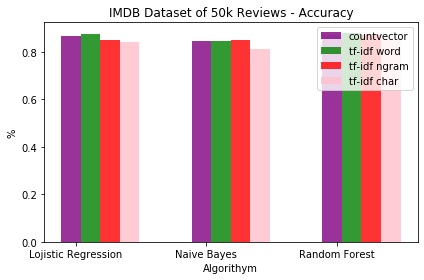

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
cv = (accuracy, accuracy4, 0.87)
word = (accuracy1, accuracy5, 0.88)
ngram = (0.85, accuracy6, 0.87)
char = (accuracy3, accuracy7, 0.85)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, cv, bar_width,
alpha=opacity,
color='purple',
label='countvector')

rects2 = plt.bar(index + bar_width, word, bar_width,
alpha=opacity,
color='g',
label='tf-idf word')

rects3 = plt.bar(index + bar_width*2, ngram, bar_width,
alpha=opacity,
color='red',
label='tf-idf ngram')

rects3 = plt.bar(index + bar_width*3, char, bar_width,
alpha=opacity,
color='pink',
label='tf-idf char')

plt.xlabel('Algorithym')
plt.ylabel('%')
plt.title('IMDB Dataset of 50k Reviews - Accuracy')
plt.xticks(index + bar_width/4, ('Lojistic Regression', 'Naive Bayes', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()

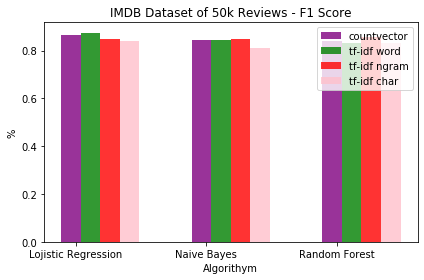

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
cv = (f1_score, f1_score4, 0.84)
word = (f1_score1, f1_score5, 0.83)
ngram = (0.85, f1_score6, 0.8560)
char = (f1_score3, f1_score7, 0.83)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, cv, bar_width,
alpha=opacity,
color='purple',
label='countvector')

rects2 = plt.bar(index + bar_width, word, bar_width,
alpha=opacity,
color='g',
label='tf-idf word')

rects3 = plt.bar(index + bar_width*2, ngram, bar_width,
alpha=opacity,
color='red',
label='tf-idf ngram')

rects3 = plt.bar(index + bar_width*3, char, bar_width,
alpha=opacity,
color='pink',
label='tf-idf char')

plt.xlabel('Algorithym')
plt.ylabel('%')
plt.title("IMDB Dataset of 50k Reviews - F1 Score")
plt.xticks(index + bar_width/4, ('Lojistic Regression', 'Naive Bayes', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()